<a href="https://colab.research.google.com/github/askewai/ML_challenge/blob/main/d10-termDepo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### data source: UCI (DOI: 10.24432/C5K306)

The dataset pertains to direct marketing campaigns conducted via phone calls by a Portuguese banking institution, aiming to predict whether a client will subscribe to a term deposit (variable y). It is a multivariate dataset with 45,211 instances and 16 features, including categorical and integer types, covering demographic and banking-related attributes such as age, job, marital status, education, credit default status, balance, housing and personal loans, contact type, and campaign-related details like contact duration, number of contacts, and previous campaign outcomes. The dataset is divided into four subsets: bank-additional-full.csv and bank-additional.csv with 20 inputs, and bank-full.csv and bank.csv with 17 inputs, with the smaller subsets designed for testing computationally intensive algorithms. The classification goal is binary (yes/no), and the dataset, which has no missing values, was analyzed in a 2014 paper by Moro et al., published in *Decision Support Systems*, focusing on predicting the success of bank telemarketing campaigns.

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

In [4]:
df = pd.concat([X, y], axis=1)

# EDA

In [5]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


In [6]:
df.nunique()

,0
age,77
job,11
marital,3
education,3
default,2
balance,7168
housing,2
loan,2
contact,2
day_of_week,31


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


<ipython-input-10-e188ed7232f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='BuGn_r')


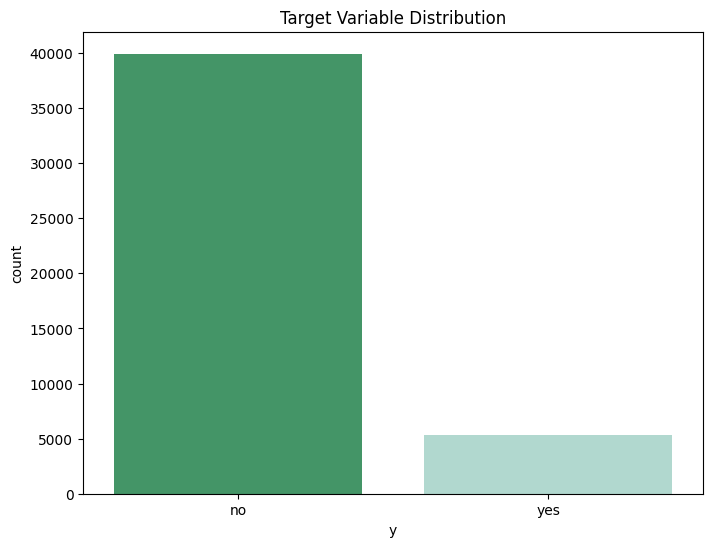

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='y', data=df, palette='BuGn_r')
plt.title('Target Variable Distribution')
plt.show()

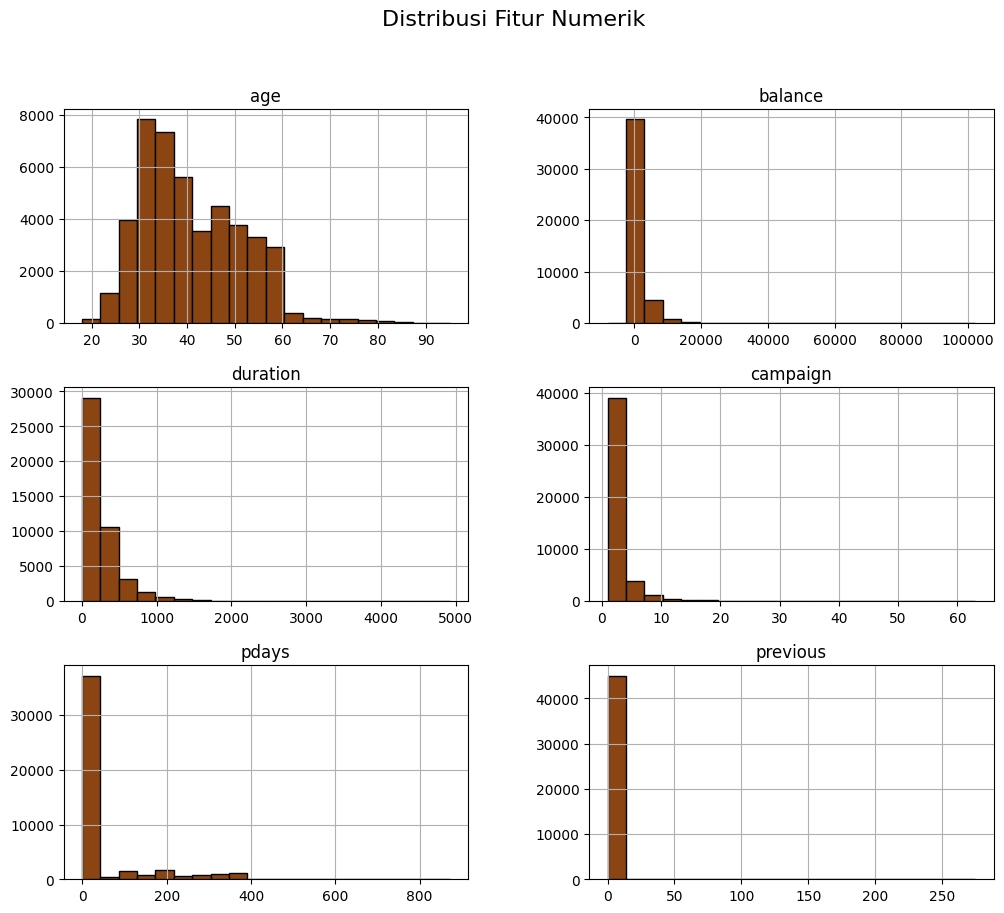

In [11]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df[num_cols].hist(figsize=(12,10), bins=20, color='saddlebrown', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.show()

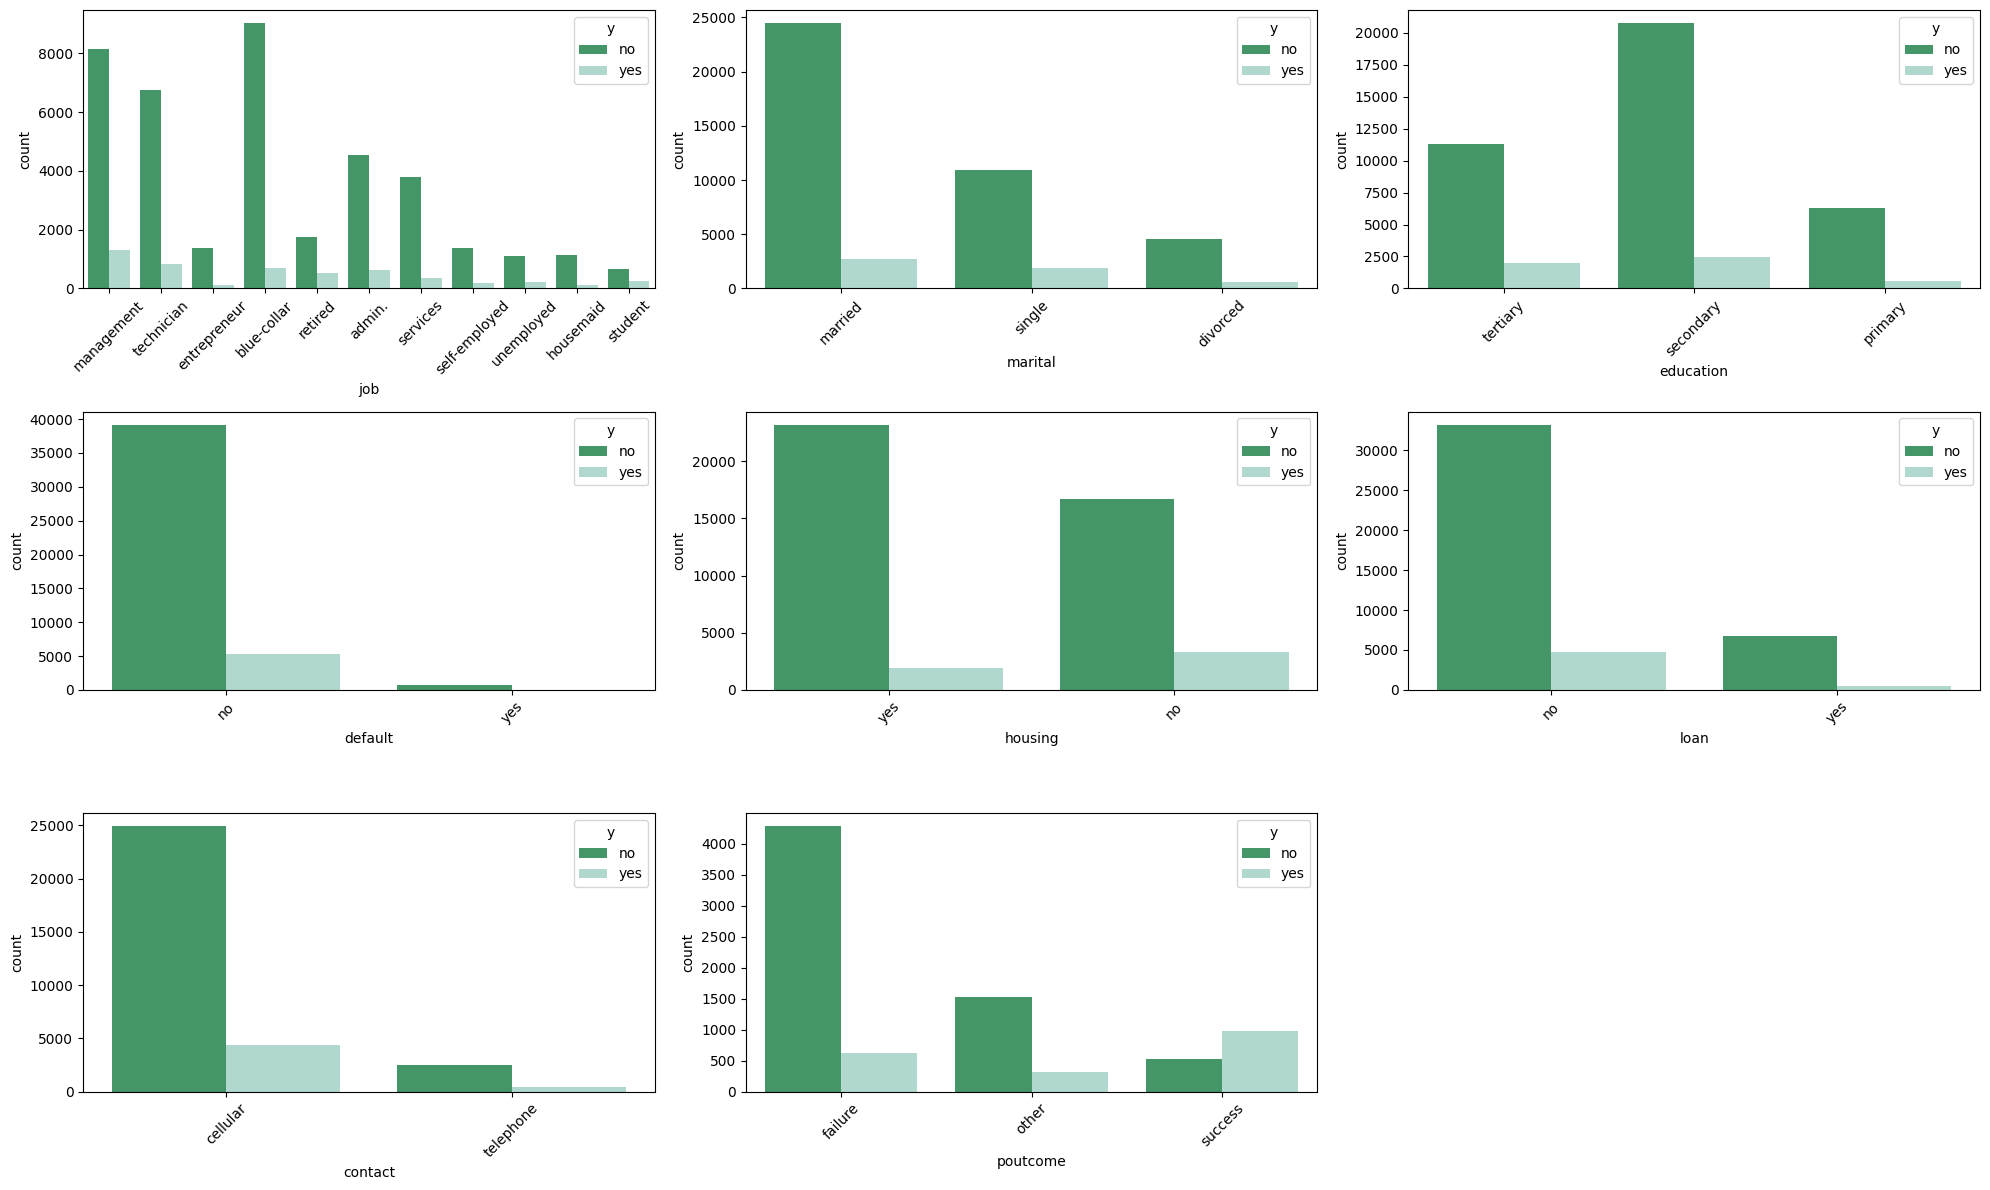

In [12]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
plt.figure(figsize=(20,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='y', data=df, palette='BuGn_r')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

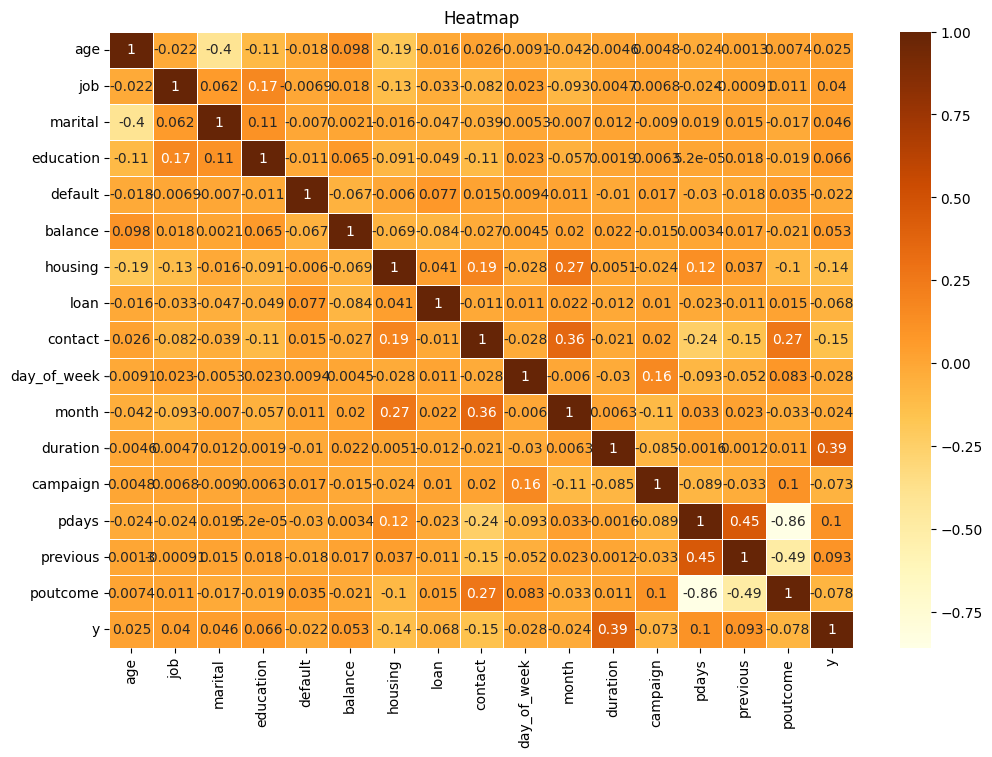

In [13]:
plt.figure(figsize=(12,8))
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])
sns.heatmap(df_encoded.corr(), annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title('Heatmap')
plt.show()

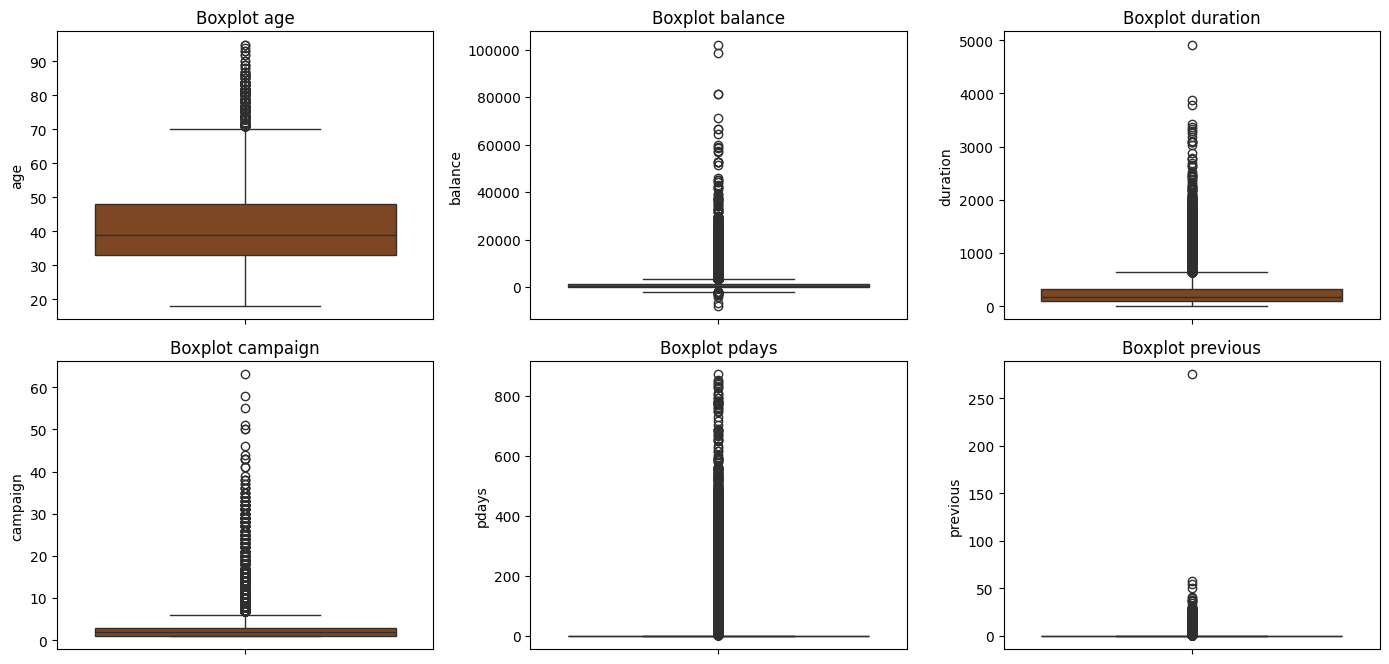

In [14]:
plt.figure(figsize=(14,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='saddlebrown')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

preprocessing

In [15]:
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['contact'].fillna('unknown', inplace=True)
df['poutcome'].fillna('unknown', inplace=True)

<ipython-input-15-b169ceeb4d0c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].fillna(df['job'].mode()[0], inplace=True)
<ipython-input-15-b169ceeb4d0c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [16]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [17]:
le = LabelEncoder()
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']:
    df[col] = le.fit_transform(df[col])

In [18]:
X = df.drop(columns=['y'])
y = df['y']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelling

In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [20]:
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    model_results[name] = acc
    print(f'{name} Accuracy: {acc:.4f}')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(conf_matrix)
    print('-'*50)

Logistic Regression Accuracy: 0.8895
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.58      0.29      0.39      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.63      0.67      9043
weighted avg       0.87      0.89      0.87      9043

Confusion Matrix:
[[7723  229]
 [ 770  321]]
--------------------------------------------------
Random Forest Accuracy: 0.9020
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.64      0.42      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043

Confusion Matrix:
[[7701  251]
 [ 635  456]]
--------------------------------------------------
Gradient Boosting Accuracy: 0.9005
              precision    recall  f1-score   suppo

<ipython-input-21-652bf9471e57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='YlOrBr')


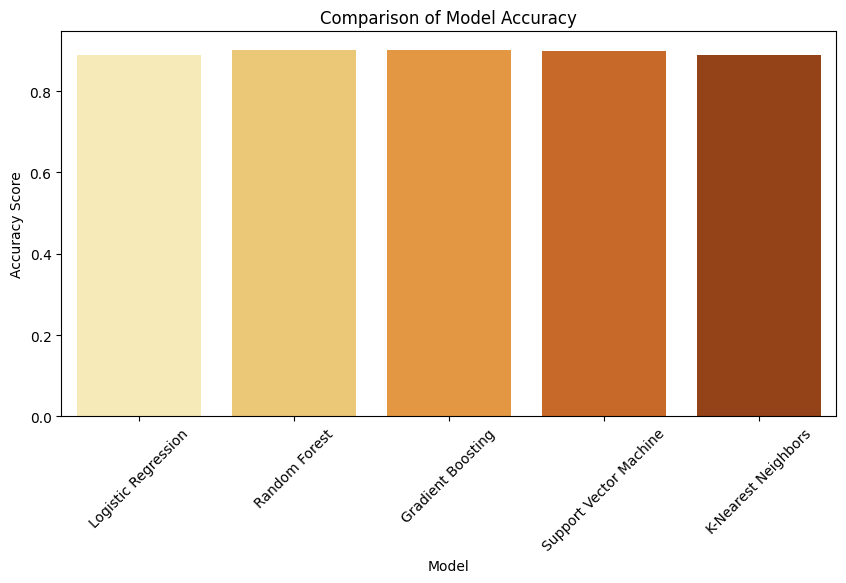

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='YlOrBr')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy')
plt.xticks(rotation=45)
plt.show()